In [1]:
import json
import re
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

%matplotlib inline

In [2]:
# with open('SMADscripts/filter_tweets/scoring/data/170520_shooting_tweets.json') as f:
#     data = json.load(f)
file = 'filter_tweets/scoring/data/170520_shooting_tweets.json'
# with open('SMADscripts/filter_tweets/scoring/data/') as f:
#     data = json.load(f)

data = pd.read_json(file, lines=True).to_dict(orient='records')

In [3]:
tweet, iden = [],[]
for x,y in enumerate(data):
    tweet.append(data[x]['text'])
    iden.append(data[x]['id'].strip('"'))
#     print(data[x]['id'].strip('""'))
#     break
print(len(tweet),len(iden))
record = dict(zip(iden,tweet))

198649 198649


In [4]:
print(iden[:2])
print(record['277995889660928001'])

['277995889660928001', '226523634406154240']
CODE THIS TWEET:

"rt @faith4liberty: states►obama did not win re-election! #voterfraud►must stop before finalized►#teaparty #sot #tcot #nra #ccot wnd http ..."

RETWEET, FOR CONTEXT:

"states►obama did not win re-election! #voterfraud►must stop before finalized►#teaparty #sot #tcot #nra #ccot wnd http://t.co/daviitx5"""


In [5]:
print(tweet[:10])
print(iden[0])

['CODE THIS TWEET:\n\n"rt @faith4liberty: states►obama did not win re-election! #voterfraud►must stop before finalized►#teaparty #sot #tcot #nra #ccot wnd http ..."\n\nRETWEET, FOR CONTEXT:\n\n"states►obama did not win re-election! #voterfraud►must stop before finalized►#teaparty #sot #tcot #nra #ccot wnd http://t.co/daviitx5"""', 'CODE THIS TWEET:\n\n"i still can\'t believe #theatershooting happened. sucks!!"\n\nRETWEET, FOR CONTEXT:\n\n""', 'CODE THIS TWEET:\n\n"rt @racinescanner: express foods, 2014 douglas. kids fighting, 1 kid in a wheelchair and another kid both have guns."\n\nRETWEET, FOR CONTEXT:\n\n"express foods, 2014 douglas. kids fighting, 1 kid in a wheelchair and another kid both have guns."', 'CODE THIS TWEET:\n\n"rt @hickwonka: we\'re the bad news, we\'re the young guns, we\'re the ones that they told you to run from"\n\nRETWEET, FOR CONTEXT:\n\n"we\'re the bad news, we\'re the young guns, we\'re the ones that they told you to run from"', 'CODE THIS TWEET:\n\n"rt @abc7:

In [6]:
REGEX_tweet_id = re.compile(r'[0-9]{18}')
REGEX_date = re.compile(r'[0-9]{4}-[0-9]{2}-[0-9]{2}\s[0-9]{2}:[0-9]{2}:[0-9]{2}')
# REGEX_tweet = re.compile(r'[0-9]{18}')

In [7]:
i = 0

temp_id = []
temp_time = []

files = ['filter_tweets/scoring/data/mass_shooting_twitter_2012.csv','filter_tweets/scoring/data/mass_shooting_twitter_2013.csv','filter_tweets/scoring/data/mass_shooting_twitter_2014.csv']

for file in files:
    with open(file,'r') as f:
        try:
            for line in f:
                match1 = re.search(REGEX_tweet_id, line)
                match2 = re.search(REGEX_date, line)

                temp_id.append(line[match1.start():match1.end()])
                temp_time.append(line[match2.start():match2.end()])

                i += 1
        except UnicodeDecodeError:
            print(f,'error')

    print(i)

<_io.TextIOWrapper name='filter_tweets/scoring/data/mass_shooting_twitter_2012.csv' mode='r' encoding='UTF-8'> error
993835
5934599
<_io.TextIOWrapper name='filter_tweets/scoring/data/mass_shooting_twitter_2014.csv' mode='r' encoding='UTF-8'> error
9330240


In [8]:
len(temp_id),len(temp_time)

(9330240, 9330240)

In [9]:
len(set(temp_time))

8376676

In [10]:
len(set(temp_id))

9281715

In [11]:
set(temp_id)

{'296073675688521729',
 '350425714794827777',
 '494126084997128192',
 '361384932045623297',
 '457743806931423233',
 '282157243426807808',
 '498935940728225793',
 '498523569253404672',
 '531382279458017280',
 '379678502498619392',
 '492072348237828096',
 '489116705759977472',
 '456500732737249280',
 '204082061294837760',
 '325051509618405376',
 '397099875445538816',
 '336639851300544513',
 '222710383033597952',
 '444701710796476416',
 '420955847691235328',
 '299718379076460544',
 '370718139581235200',
 '379717631030599681',
 '490886073086509056',
 '498049227302666241',
 '501687882114154496',
 '379014032361267201',
 '308109415461056512',
 '505921524780793857',
 '454465316513280000',
 '310178662647463937',
 '436296774546767872',
 '490129517235953664',
 '393737943678210048',
 '522059822297272321',
 '346006743249207296',
 '485325818566946816',
 '405319822202138624',
 '293571244807290880',
 '290558002275180544',
 '227866474486824960',
 '391115778168066048',
 '379737524777652224',
 '486590279

In [12]:
shallow = dict(zip(temp_id,temp_time))

In [13]:
shallow['280782790923018241']

'2012-12-17 21:13:28'

In [14]:
yes,no = 0.0,0.0
date_range = []
for i in range(len(data)):
#     if (i%2000==0):
#         print(i)
#     try:
    data[i]['time'] = np.nan
    key = data[i]['id'].strip('"')
    if key in shallow:
        date_range.append(shallow[key])
        yes += 1.0
        data[i]['time'] = shallow[key]
    else:
        no += 1
print(yes*100/len(data),no*100/len(data))

71.86595452280153 28.134045477198477


In [15]:
data[1003]['time']

'2013-06-09 15:15:32'

In [16]:
with open('filter_tweets/scoring/data/with_dates.json', 'w') as outfile:
    json.dump(data, outfile)

In [17]:
file = 'filter_tweets/scoring/data/with_dates.json'
with open(file) as f:
    data_temp = json.load(f)

In [18]:
len(data_temp), len(data)

(198649, 198649)

In [19]:
date_range = sorted(date_range)

In [20]:
volume = pd.Series([pd.to_datetime(d).date() for d in date_range])

TypeError: 'module' object is not callable

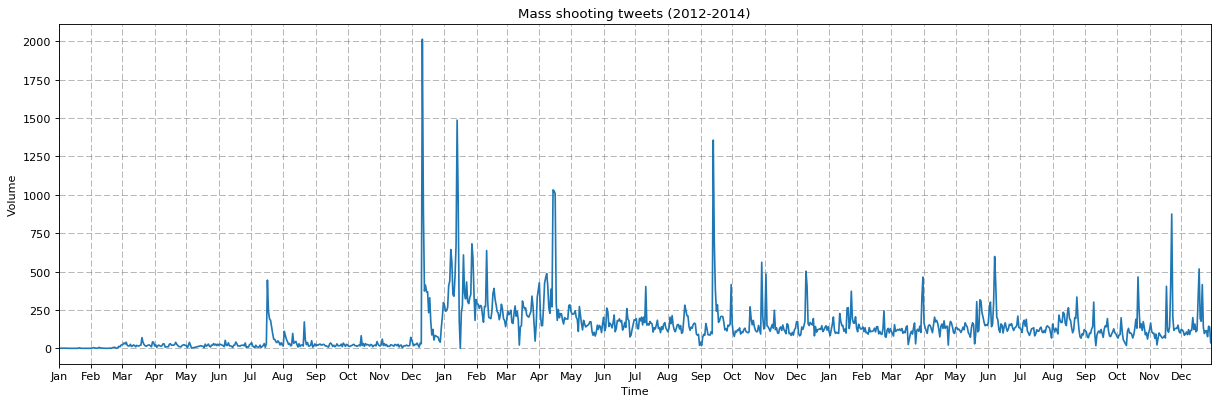

In [64]:
fig = plt.figure(figsize=(16,5),dpi=80)
ax = fig.add_axes([0.07,0.1,0.9,0.85])
ax.set_xticks(MONTH_MARK)
ax.set_xticklabels(MONTHS+MONTHS+MONTHS)
ax.set_title("Mass shooting tweets (2012-2014)")
ax.set_ylabel("Volume")
ax.set_xlabel("Time")
volume.value_counts().plot()
fig.canvas.draw()
ax.grid(color='0.5', linestyle='--', linewidth=0.5)
# ax.vlines([datetime(2013,1,1)],0,6000,linestyles='dotted',colors='grey',linewidth=1)
fig.savefig('volume.pdf')

In [39]:
MONTHS = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [42]:
from dateutil.relativedelta import relativedelta

In [54]:
MONTH_MARK = [(datetime.date(2012,1,4)+relativedelta(months=i)) for i in range(36)]

In [53]:
((datetime.date(2015,1,1)-datetime.date(2012,1,4)).days)/30

36.43333333333333

In [22]:
with open('filter_tweets/scoring/scores/scored_class1.json') as f:
    class1 = json.load(f)
with open('filter_tweets/scoring/scores/scored_class2.json') as f:
    class2 = json.load(f)
with open('filter_tweets/scoring/scores/scored_class4.json') as f:
    class4 = json.load(f)

In [23]:
timestamp = []
score_c1 = []
score_c2 = []
score_c4 = []
for i,key in enumerate(class1):
    score_c1.append(class1[key][0])
    timestamp.append(pd.to_datetime(class1[key][1]).date())
for i,key in enumerate(class2):
    score_c2.append(class2[key][0])
for i,key in enumerate(class4):
    score_c4.append(class4[key][0])

In [24]:
score_df = pd.DataFrame({'date':timestamp,'2A':score_c1,'policy':score_c2,'prayers':score_c4})

In [25]:
score_df = score_df.dropna(how='any').sort_values(by='date').reset_index(drop=True)

In [26]:
score_df['dd'] = score_df['date']-datetime.date(2012,1,4)

In [27]:
score_df

2A        date    policy   prayers        dd
0       0.006462  2012-01-04  0.026066  0.005712    0 days
1       0.045735  2012-01-09  0.024711  0.007637    5 days
2       0.014889  2012-01-09  0.006259  0.080312    5 days
3       0.021600  2012-01-14  0.016566  0.065475   10 days
4       0.018156  2012-01-21  0.028637  0.019257   17 days
5       0.023089  2012-01-22  0.149306  0.004934   18 days
6       0.028659  2012-01-23  0.068066  0.022056   19 days
7       0.035320  2012-01-23  0.112344  0.002994   19 days
8       0.019630  2012-01-23  0.022984  0.003466   19 days
9       0.040853  2012-01-24  0.148634  0.003922   20 days
10      0.051375  2012-01-24  0.049565  0.034944   20 days
11      0.147652  2012-01-24  0.475658  0.001229   20 days
12      0.346914  2012-01-24  0.814757  0.002474   20 days
13      0.096790  2012-01-25  0.139929  0.018224   21 days
14      0.048400  2012-02-03  0.050234  0.056232   30 days
15      0.026176  2012-02-05  0.329487  0.001303   32 days
16      0.025249  2012-02-05  0.077237  0.173693   32 days
17      0.028127  2012-02-05  0.011871  0.074707   32 days
18      0.029286  2012-02-06  0.050318  0.014282   33 days
19      0.018881  2012-02-06  0.304679  0.015603   33 days
20      0.005596  2012-02-06  0.096708  0.005098   33 days
21      0.039746  2012-02-06  0.479089  0.017860   33 days
22      0.068283  2012-02-06  0.262629  0.020285   33 days
23      0.076874  2012-02-06  0.374616  0.006281   33 days
24      0.089132  2012-02-07  0.218375  0.012925   34 days
25      0.031790  2012-02-07  0.031183  0.026213   34 days
26      0.025603  2012-02-07  0.126425  0.051174   34 days
27      0.368081  2012-02-10  0.899233  0.003919   37 days
28      0.028249  2012-02-11  0.040669  0.046127   38 days
29      0.037679  2012-02-11  0.146342  0.033835   38 days
...          ...         ...       ...       ...       ...
142731  0.077386  2015-01-01  0.075519  0.005760 1093 days
142732  0.075923  2015-01-01  0.395029  0.045944 1093 days
142733  0.218456  2015-01-01  0.386581  0.002419 1093 days
142734  0.061234  2015-01-01  0.278872  0.001071 1093 days
142735  0.019474  2015-01-01  0.581496  0.015944 1093 days
142736  0.003364  2015-01-01  0.030918  0.085040 1093 days
142737  0.060151  2015-01-01  0.350158  0.041394 1093 days
142738  0.011223  2015-01-01  0.089451  0.037924 1093 days
142739  0.009495  2015-01-01  0.345465  0.035845 1093 days
142740  0.061234  2015-01-01  0.278872  0.001071 1093 days
142741  0.006512  2015-01-01  0.065406  0.115077 1093 days
142742  0.061234  2015-01-01  0.278872  0.001071 1093 days
142743  0.044509  2015-01-01  0.104645  0.002767 1093 days
142744  0.015166  2015-01-01  0.089026  0.035355 1093 days
142745  0.052773  2015-01-01  0.053005  0.056752 1093 days
142746  0.008739  2015-01-01  0.048982  0.017235 1093 days
142747  0.023091  2015-01-01  0.177723  0.011365 1093 days
142748  0.016308  2015-01-01  0.069079  0.012354 1093 days
142749  0.091890  2015-01-01  0.823010  0.010738 1093 days
142750  0.007557  2015-01-01  0.063647  0.009042 1093 days
142751  0.028580  2015-01-01  0.590441  0.007490 1093 days
142752  0.047729  2015-01-01  0.118753  0.041733 1093 days
142753  0.061234  2015-01-01  0.278872  0.001071 1093 days
142754  0.020510  2015-01-01  0.036489  0.072837 1093 days
142755  0.018897  2015-01-01  0.036892  0.012578 1093 days
142756  0.070415  2015-01-01  0.068164  0.028823 1093 days
142757  0.038066  2015-01-01  0.081289  0.076580 1093 days
142758  0.014029  2015-01-01  0.016861  0.005782 1093 days
142759  0.057551  2015-01-01  0.045457  0.034760 1093 days
142760  0.015709  2015-01-01  0.015054  0.065198 1093 days

[142761 rows x 5 columns]

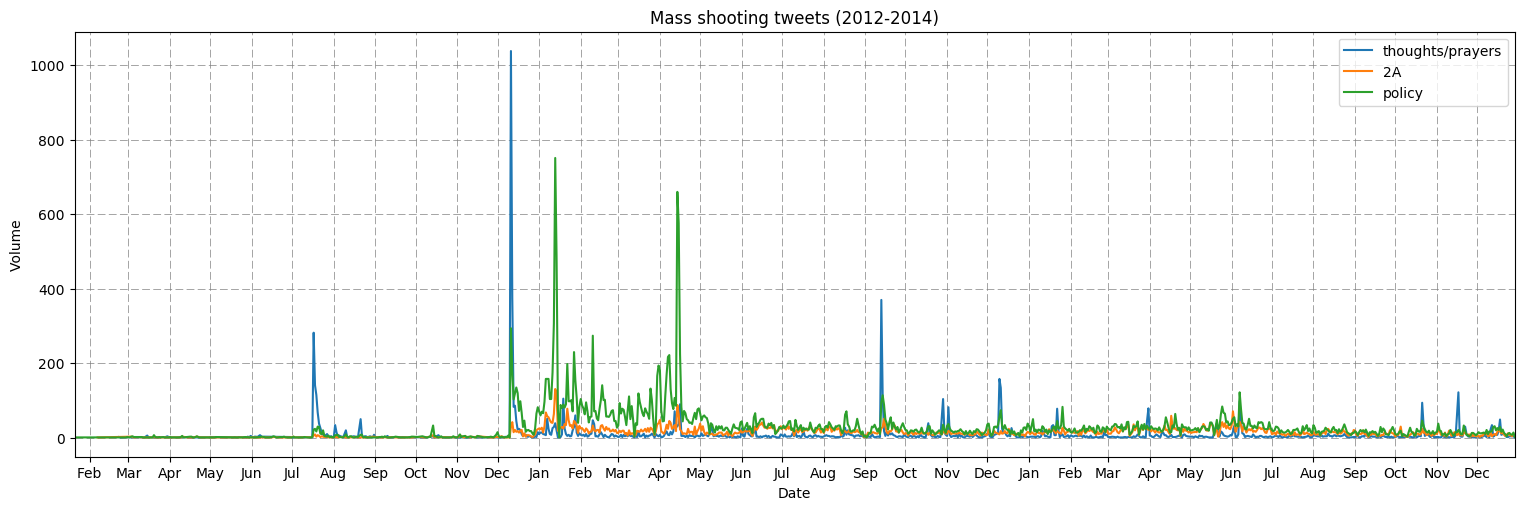

In [88]:
fig = plt.figure(figsize=(16,5),dpi=100)
ax = fig.add_axes([0.07,0.1,0.9,0.85])
ax.set_xticks(MONTH_MARK)
ax.set_xticklabels(MONTHS+MONTHS+MONTHS)
ax.set_title("Mass shooting tweets (2012-2014)")
ax.set_ylabel("Volume")
ax.set_xlabel("Date")
x = np.linspace(0,(MONTH_MARK[-1]-MONTH_MARK[0]).days,len(score_df))
# ax.set_title("Mass shooting related tweets (blue=thoughts/prayers, orange=2A, green=policy)")
prayers = score_df['date'][score_df['prayers']>0.2].value_counts().rename("thoughts/prayers").plot()
# score_df['date'][(score_df['2A']>0.2) | (score_df['policy']>0.7)].value_counts().plot()
score_df['date'][score_df['2A']>0.36].value_counts().rename("2A").plot()
score_df['date'][score_df['policy']>0.7].value_counts().rename('policy').plot()
ax.grid(color='0.5', linestyle='--', linewidth=0.5)
# ax.vlines(x[365:400],0,1000,linestyles='dotted',colors='black',linewidth=1)
plt.legend()
fig.canvas.draw()
fig.savefig('volume_sep.pdf')



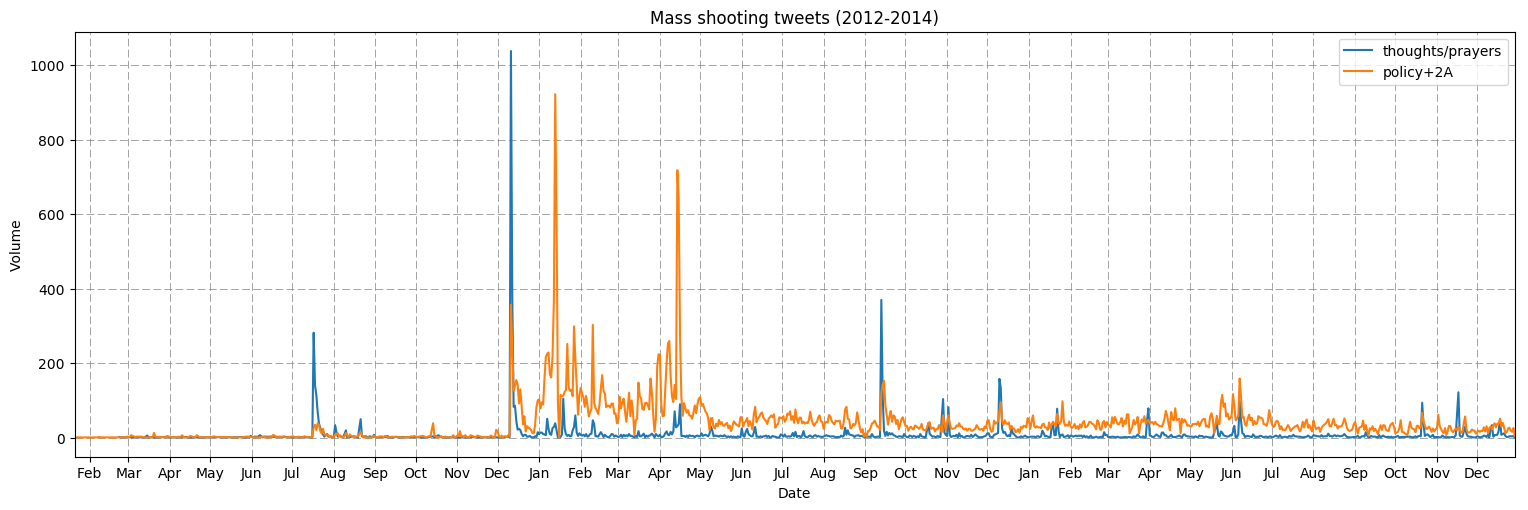

In [89]:
fig = plt.figure(figsize=(16,5),dpi=100)
ax = fig.add_axes([0.07,0.1,0.9,0.85])
ax.set_xticks(MONTH_MARK)
ax.set_xticklabels(MONTHS+MONTHS+MONTHS)
ax.set_title("Mass shooting tweets (2012-2014)")
ax.set_ylabel("Volume")
ax.set_xlabel("Date")
x = np.linspace(0,(MONTH_MARK[-1]-MONTH_MARK[0]).days,len(score_df))
# ax.set_title("Mass shooting related tweets (blue=thoughts/prayers, orange=2A, green=policy)")
prayers = score_df['date'][score_df['prayers']>0.2].value_counts().rename("thoughts/prayers").plot()
score_df['date'][(score_df['2A']>0.2) | (score_df['policy']>0.7)].value_counts().rename('policy+2A').plot()
# score_df['date'][score_df['2A']>0.36].value_counts().rename("2A").plot()
# score_df['date'][score_df['policy']>0.7].value_counts().rename('policy').plot()
ax.grid(color='0.5', linestyle='--', linewidth=0.5)
# ax.vlines(x[365:400],0,1000,linestyles='dotted',colors='black',linewidth=1)
plt.legend()
fig.canvas.draw()
fig.savefig('volume_combined.pdf')

In [29]:
score_df

2A        date    policy   prayers        dd
0       0.006462  2012-01-04  0.026066  0.005712    0 days
1       0.045735  2012-01-09  0.024711  0.007637    5 days
2       0.014889  2012-01-09  0.006259  0.080312    5 days
3       0.021600  2012-01-14  0.016566  0.065475   10 days
4       0.018156  2012-01-21  0.028637  0.019257   17 days
5       0.023089  2012-01-22  0.149306  0.004934   18 days
6       0.028659  2012-01-23  0.068066  0.022056   19 days
7       0.035320  2012-01-23  0.112344  0.002994   19 days
8       0.019630  2012-01-23  0.022984  0.003466   19 days
9       0.040853  2012-01-24  0.148634  0.003922   20 days
10      0.051375  2012-01-24  0.049565  0.034944   20 days
11      0.147652  2012-01-24  0.475658  0.001229   20 days
12      0.346914  2012-01-24  0.814757  0.002474   20 days
13      0.096790  2012-01-25  0.139929  0.018224   21 days
14      0.048400  2012-02-03  0.050234  0.056232   30 days
15      0.026176  2012-02-05  0.329487  0.001303   32 days
16      0.025249  2012-02-05  0.077237  0.173693   32 days
17      0.028127  2012-02-05  0.011871  0.074707   32 days
18      0.029286  2012-02-06  0.050318  0.014282   33 days
19      0.018881  2012-02-06  0.304679  0.015603   33 days
20      0.005596  2012-02-06  0.096708  0.005098   33 days
21      0.039746  2012-02-06  0.479089  0.017860   33 days
22      0.068283  2012-02-06  0.262629  0.020285   33 days
23      0.076874  2012-02-06  0.374616  0.006281   33 days
24      0.089132  2012-02-07  0.218375  0.012925   34 days
25      0.031790  2012-02-07  0.031183  0.026213   34 days
26      0.025603  2012-02-07  0.126425  0.051174   34 days
27      0.368081  2012-02-10  0.899233  0.003919   37 days
28      0.028249  2012-02-11  0.040669  0.046127   38 days
29      0.037679  2012-02-11  0.146342  0.033835   38 days
...          ...         ...       ...       ...       ...
142731  0.077386  2015-01-01  0.075519  0.005760 1093 days
142732  0.075923  2015-01-01  0.395029  0.045944 1093 days
142733  0.218456  2015-01-01  0.386581  0.002419 1093 days
142734  0.061234  2015-01-01  0.278872  0.001071 1093 days
142735  0.019474  2015-01-01  0.581496  0.015944 1093 days
142736  0.003364  2015-01-01  0.030918  0.085040 1093 days
142737  0.060151  2015-01-01  0.350158  0.041394 1093 days
142738  0.011223  2015-01-01  0.089451  0.037924 1093 days
142739  0.009495  2015-01-01  0.345465  0.035845 1093 days
142740  0.061234  2015-01-01  0.278872  0.001071 1093 days
142741  0.006512  2015-01-01  0.065406  0.115077 1093 days
142742  0.061234  2015-01-01  0.278872  0.001071 1093 days
142743  0.044509  2015-01-01  0.104645  0.002767 1093 days
142744  0.015166  2015-01-01  0.089026  0.035355 1093 days
142745  0.052773  2015-01-01  0.053005  0.056752 1093 days
142746  0.008739  2015-01-01  0.048982  0.017235 1093 days
142747  0.023091  2015-01-01  0.177723  0.011365 1093 days
142748  0.016308  2015-01-01  0.069079  0.012354 1093 days
142749  0.091890  2015-01-01  0.823010  0.010738 1093 days
142750  0.007557  2015-01-01  0.063647  0.009042 1093 days
142751  0.028580  2015-01-01  0.590441  0.007490 1093 days
142752  0.047729  2015-01-01  0.118753  0.041733 1093 days
142753  0.061234  2015-01-01  0.278872  0.001071 1093 days
142754  0.020510  2015-01-01  0.036489  0.072837 1093 days
142755  0.018897  2015-01-01  0.036892  0.012578 1093 days
142756  0.070415  2015-01-01  0.068164  0.028823 1093 days
142757  0.038066  2015-01-01  0.081289  0.076580 1093 days
142758  0.014029  2015-01-01  0.016861  0.005782 1093 days
142759  0.057551  2015-01-01  0.045457  0.034760 1093 days
142760  0.015709  2015-01-01  0.015054  0.065198 1093 days

[142761 rows x 5 columns]

In [83]:
prayers.name

'date'

In [31]:
file = 'filter_tweets/scoring/data/train_labels.json'
labeled_a = pd.read_json('filter_tweets/scoring/data/train_labels.json', lines=True).to_dict(orient='records')
labeled_b = pd.read_json('filter_tweets/scoring/data/test_labels.json', lines=True).to_dict(orient='records')

In [32]:
verified =  list(labeled_a[0].keys())+list(labeled_b[0].keys())
len(verified)

2386

In [33]:
data

[{'category': 'gun_policy',
  'features': [-5.3084871893,
   12.9640831011,
   -4.1047083052,
   -4.9715587675,
   0.34193901130000004,
   2.6686073992,
   5.1486883088,
   -5.4748583284,
   0.2576618553,
   10.3084110087,
   5.4943122308,
   4.6392834979,
   -0.6390895227,
   -0.8002715319,
   -7.115556649,
   -0.6953792425,
   1.5301897136,
   -2.5701770045,
   0.7356134613,
   1.638593395,
   1.3852451552,
   -8.0384126172,
   1.0800301315,
   -3.4338024223,
   -2.5038871463,
   -1.8567625462000001,
   -0.903651874,
   -2.1864308743,
   -1.3156470185,
   1.5484118475000002,
   -2.4329827432,
   0.9425520737,
   -3.1814135362,
   5.4084458627,
   1.9533544441,
   1.0393446684,
   -0.0026718732,
   -1.4632385871,
   3.1916063069,
   -0.6756946410000001,
   -2.2258500115,
   1.1633234006,
   -1.9499040612,
   -2.1058777133,
   -3.6286118871,
   -2.4782950517,
   -3.7688328597,
   -1.8779665384,
   -4.8697142168,
   1.9806571547,
   -2.4836496306,
   -2.5805224069,
   0.1719830514,
   2